K-Nearest Neighbors Implementation

After completing this lab you will be able to:

    Use K Nearest neighbors to classify data

In this Lab you will load a customer dataset, fit the data, and use K-Nearest Neighbors to predict a data point. But what is K-Nearest Neighbors?

K-Nearest Neighbors is a supervised learning algorithm. Where the data is 'trained' with data points corresponding to their classification. To predict the class of a given data point, it takes into account the classes of the 'K' nearest data points and chooses the class in which the majority of the 'K' nearest data points belong to as the predicted class.


### Here's an visualization of the K-Nearest Neighbors algorithm.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/KNN_Diagram.png">

In this case, we have data points of Class A and B. We want to predict what the star (test data point) is. If we consider a k value of 3 (3 nearest data points), we will obtain a prediction of Class B. Yet if we consider a k value of 6, we will obtain a prediction of Class A.

In this sense, it is important to consider the value of k. Hopefully from this diagram, you should get a sense of what the K-Nearest Neighbors algorithm is. It considers the 'K' Nearest Neighbors (data points) when it predicts the classification of the test point.


In [ ]:
!pip install scikit-learn

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset, with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.

The target field, called custcat, has four possible values that correspond to the four customer groups, as follows: 1- Basic Service 2- E-Service 3- Plus Service 4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.


Load Data


In [6]:
df = pd.read_csv('custcat.csv')
df.head()

# Let’s see how many of each class/category is in our data set

df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<AxesSubplot:title={'center':'income'}>]], dtype=object)

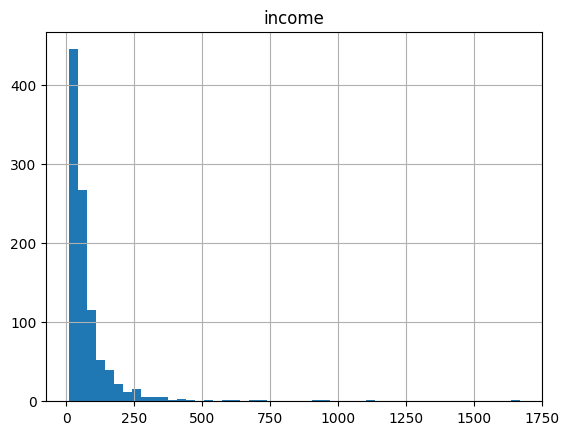

In [7]:
df.hist(column='income', bins=50)

In [8]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [9]:
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat']].values  #.astype(float)
X[0:5]

y = df['custcat'].values
y[0:5]

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004, -1.32797979],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158,  1.35119935],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004,  0.45813963],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794, -1.32797979],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577,  0.45813963]])

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 12) (800,)
Test set: (200, 12) (200,)


In [11]:
from sklearn.neighbors import KNeighborsClassifier
k = 4
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

yhat = neigh.predict(X_test)
yhat[0:5]


array([3, 1, 1, 2, 4], dtype=int64)

In [12]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.82875
Test set Accuracy:  0.735


In [31]:
k = 25
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

yhat = neigh.predict(X_test)
yhat[0:5]

for i in range(0,len(X_test)):
    print(y_test[i], yhat[i])


print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

4 3
1 1
1 2
2 2
4 4
4 4
3 3
1 1
3 3
4 4
4 3
2 2
4 3
1 1
4 3
3 3
4 4
2 2
3 3
4 4
1 3
1 1
1 1
3 4
4 4
4 4
4 4
2 2
4 4
3 4
1 1
1 1
4 4
3 2
4 3
4 4
3 3
3 3
4 4
4 4
2 3
4 4
1 1
1 1
2 2
4 4
3 3
3 3
2 2
2 2
2 1
3 3
2 2
3 3
3 3
4 4
4 4
3 3
1 1
4 4
1 1
2 2
3 3
3 3
3 3
1 1
4 4
3 3
2 2
4 4
3 3
1 1
4 4
3 3
1 1
4 4
2 1
4 3
3 4
2 2
1 1
3 3
1 1
1 1
1 1
2 3
3 3
2 2
1 1
3 2
4 4
1 1
3 3
1 1
3 4
1 1
4 4
1 1
1 1
3 2
4 3
1 1
4 3
3 3
4 4
4 4
2 2
1 2
3 3
4 4
4 4
1 1
2 2
2 2
1 1
2 2
3 3
1 1
3 4
1 1
1 1
1 1
2 2
3 3
3 3
4 4
2 2
4 3
2 3
1 1
2 2
1 1
3 3
1 1
3 3
3 3
2 2
2 1
1 1
3 3
2 2
2 2
2 2
3 3
1 1
4 4
3 2
2 1
2 2
3 4
4 4
4 4
4 4
2 2
2 3
3 3
1 1
2 2
4 4
3 3
3 3
1 1
1 1
3 3
1 1
4 4
4 4
1 1
3 3
2 1
1 1
2 2
4 3
2 2
4 4
2 2
2 2
3 4
4 3
1 1
1 3
2 3
3 3
1 1
4 3
1 2
4 3
1 1
3 3
4 4
2 3
3 3
1 1
2 2
3 3
2 2
3 3
3 3
2 2
3 3
Train set Accuracy:  0.77875
Test set Accuracy:  0.8


Range testing of K values


In [26]:
Ks = 30
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.76 , 0.68 , 0.725, 0.735, 0.73 , 0.755, 0.775, 0.77 , 0.765,
       0.79 , 0.795, 0.79 , 0.8  , 0.775, 0.775, 0.775, 0.77 , 0.775,
       0.78 , 0.79 , 0.8  , 0.79 , 0.805, 0.785, 0.8  , 0.815, 0.795,
       0.795, 0.795])

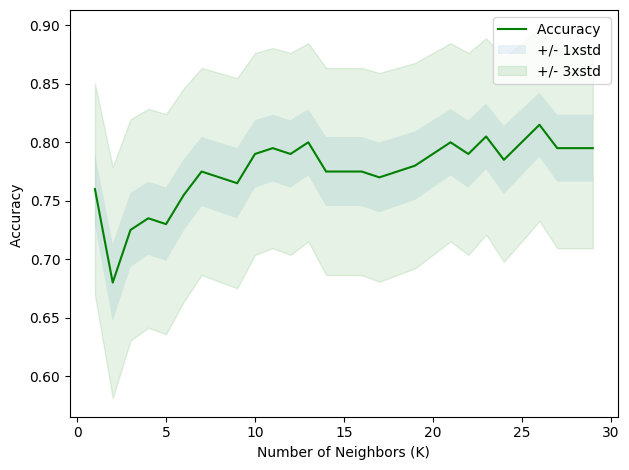

In [27]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [28]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.815 with k= 26
